# Exercise 4: Linear Regression

Dataset 'train.csv' from Kaggle Competition : House Prices : https://www.kaggle.com/c/house-prices-advanced-regression-techniques

---

Import essential libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

Declare lists for use in Q3.

In [2]:
Rsq_train = []
MSE_train = []
Rsq_test = []
MSE_test = []

---
## Problem 1: Predicting SalePrice using GrLivArea

Import the complete dataset “train.csv” in Jupyter : houseData = pd.read_csv('train.csv')

Use the following Numeric variables from the dataset in this problem : GrLivArea and SalePrice

In [3]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print("Observations (rows):", houseData.shape[0])
print("Variables (columns):", houseData.shape[1])

Observations (rows): 1460
Variables (columns): 81


### a) Plot SalePrice against GrLivArea using any appropriate bivariate plot to note the strong linear relationship.

In [5]:
# Summary statistics for GrLivArea
gla = pd.DataFrame(houseData['GrLivArea'])
gla.describe()

,GrLivArea
count,1460.000000
mean,1515.463699
std,525.480383
min,334.000000
25%,1129.500000
50%,1464.000000
75%,1776.750000
max,5642.000000


In [6]:
# Summary statistics for SalePrice
sp = pd.DataFrame(houseData['SalePrice'])
sp.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


Jointplot of SalePrice against GrLivArea

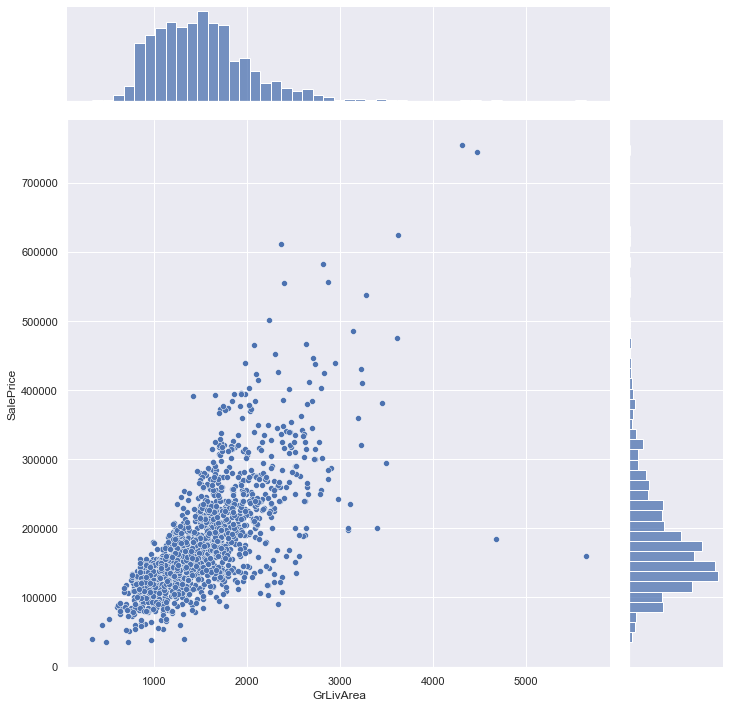

In [7]:
# Joint dataframe of the two variables
sp_gla = pd.concat([gla, sp], axis = 1)

# Jointplot of SalePrice against GrLivArea
sb.jointplot(data = sp_gla, x = "GrLivArea", y = "SalePrice", height = 10)

### b) Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.

In [8]:
sp_gla.corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


<AxesSubplot:>

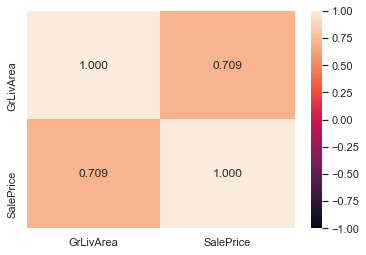

In [9]:
# Correlation using heatmap
sb.heatmap(sp_gla.corr(), vmin = -1, vmax = 1, annot = True, fmt=".3f")

### c) Import Linear Regression model from Scikit-Learn : from sklearn.linear_model import LinearRegression

Import LinearRegression and train_test_split.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

Response Variable : **SalePrice** <br> 
- y is SalePrice (sp)

Predictor Feature : **GrLivArea** <br>    
- X is GrLivArea (gla)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(gla, sp, train_size = 1100)

### e) Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using GrLivArea.

> Regression Model : SalePrice = $a$ $\times$ GrLivArea + $b$  

In [12]:
# Linear Regression object
linreg = LinearRegression()

# train the Linear Regression model
linreg.fit(X_train, y_train)

LinearRegression()

### f) Print the coefficients of the Linear Regression model you just fit, and plot the regression line on a scatterplot

In [13]:
print("Intercept: \t", linreg.intercept_)
print("Coefficient: \t", linreg.coef_)

Intercept: 	 [20272.17741237]
Coefficient: 	 [[106.4206628]]


Regression line on a scatterplot of the train dataset.

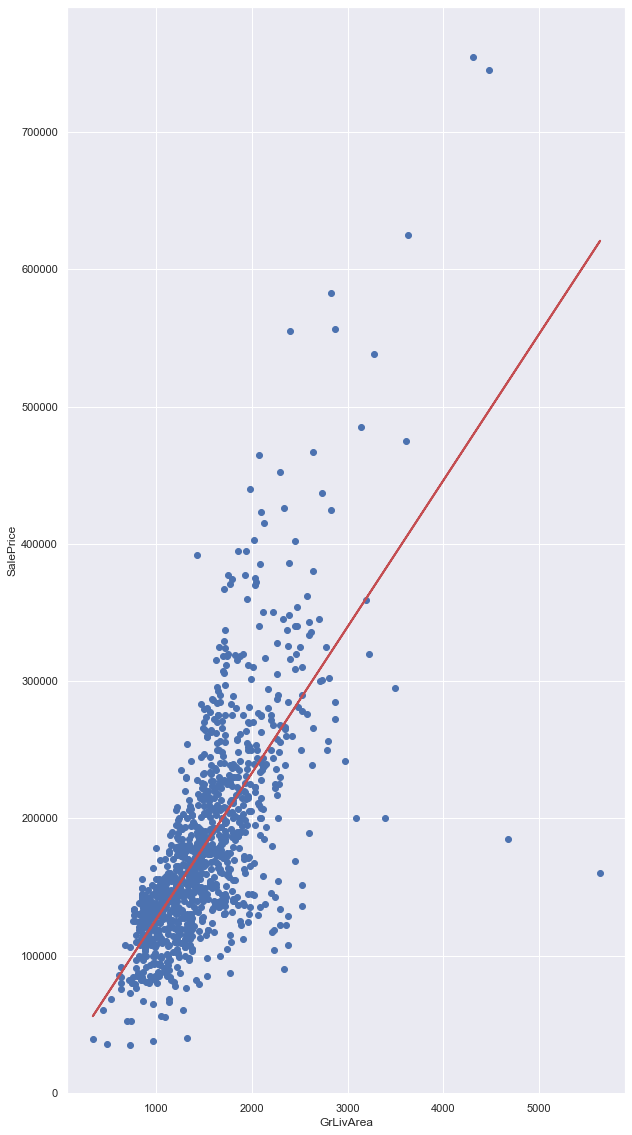

In [14]:
regline_x = X_train
regline_y = linreg.coef_ * regline_x + linreg.intercept_

# Linear Regression line & Scatterplot
f = plt.figure(figsize=(10, 20))
plt.scatter(X_train, y_train)  # scatterplot of Train Data
plt.plot(regline_x, regline_y, 'r-', linewidth = 2) # Linear Regression line
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

Regression line by prediction using the model with the train dataset.
> Prediction can only be done after fitting the Linear Regression model.

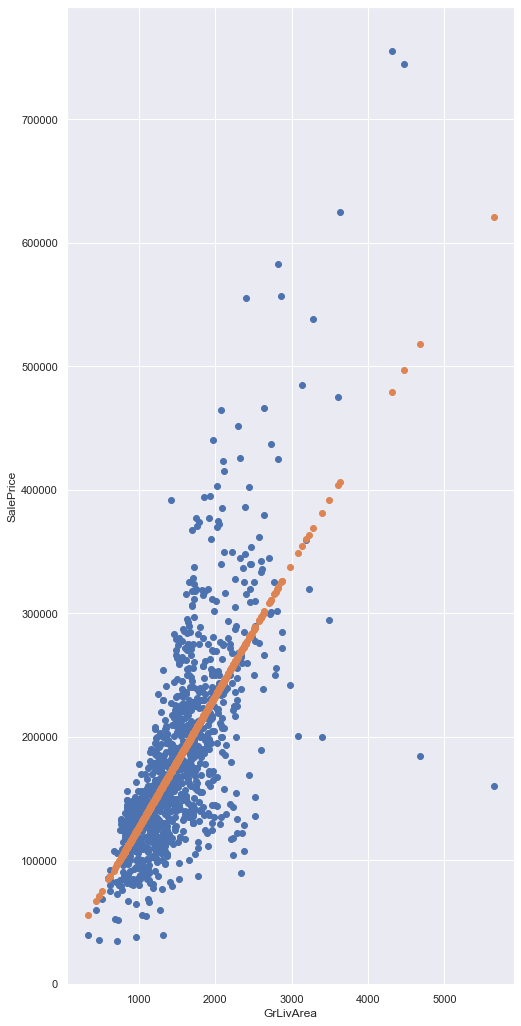

In [15]:
# Predict SalePrice (y) values corresponding to train dataset values of GrLivArea (X_train) 
y_train_pred = linreg.predict(X_train)

# Scatterplot
f = plt.figure(figsize=(8, 18))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

### g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of model.
Goodness of Fit on Train Data.

In [16]:
# Explained Variance (R^2)
print("Explained Variance (R^2):\t", linreg.score(X_train, y_train))

# Mean Squared Error
mse = np.mean(np.square(np.array(y_train) - np.array(y_train_pred)))
print("Mean Squared Error (MSE):\t", mse)

Explained Variance (R^2):	 0.49415534202693934
Mean Squared Error (MSE):	 3181345041.462254


### h) Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable GrLivArea.

In [17]:
y_test_pred = linreg.predict(X_test)

### i) Plot the predictions on a Scatterplot of GrLivArea and SalePrice in the Test Data to visualize model accuracy

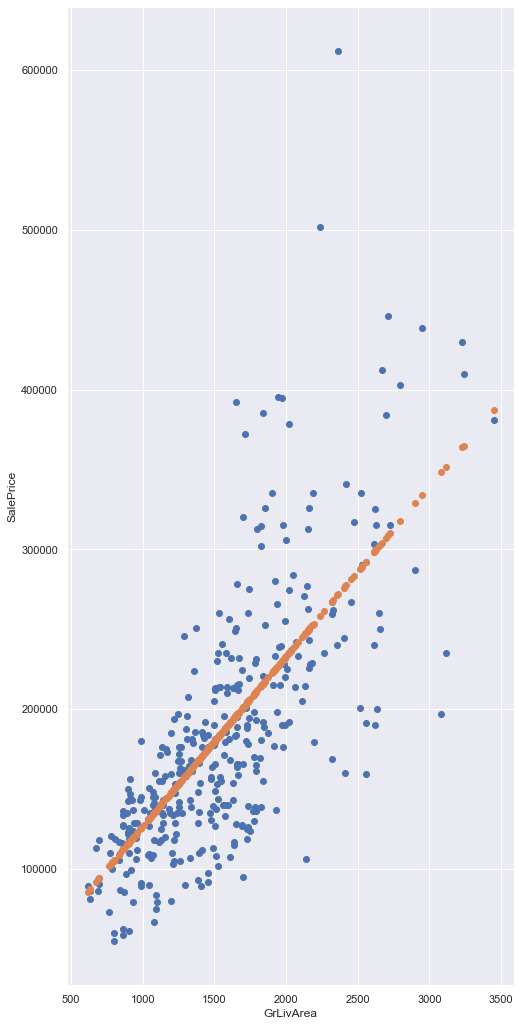

In [18]:
f = plt.figure(figsize=(8, 18))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_pred)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

### j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training.
Goodness of Fit on Test Data.

In [19]:
# Explained Variance (R^2)

print("Explained Variance (R^2):\t", linreg.score(X_test, y_test))

# Mean Squared Error
mse = np.mean(np.square(np.array(y_test) - np.array(y_test_pred)))
print("Mean Squared Error (MSE):\t", mse)

Explained Variance (R^2):	 0.525406667903032
Mean Squared Error (MSE):	 3015193284.780482


Goodness of Fit of model, comparing Test Data with Train Data.

In [20]:
# Train Data
print("TRAIN DATA -")
rs_train = linreg.score(X_train, y_train)
print("\tExplained Variance (R^2):\t", rs_train)
mse_train = np.mean(np.square(np.array(y_train) - np.array(y_train_pred)))
print("\tMean Squared Error (MSE):\t", mse_train)

print()

# Test Data
print("TEST DATA -")
rs_test = linreg.score(X_test, y_test)
print("\tExplained Variance (R^2):\t", rs_test)
mse_test = np.mean(np.square(np.array(y_test) - np.array(y_test_pred)))
print("\tMean Squared Error (MSE):\t", mse_test)

# storing values for Q3
Rsq_train.append(rs_train)
MSE_train.append(mse_train)
Rsq_test.append(rs_test)
MSE_test.append(mse_test)

TRAIN DATA -
	Explained Variance (R^2):	 0.49415534202693934
	Mean Squared Error (MSE):	 3181345041.462254

TEST DATA -
	Explained Variance (R^2):	 0.525406667903032
	Mean Squared Error (MSE):	 3015193284.780482


---
## Problem 2: Predicting SalePrice using Other Variables

Perform all the above steps on “SalePrice” against each of the variables “LotArea”, “TotalBsmtSF”, “GarageArea” oneby-one to perform individual Linear Regressions and obtain individual univariate Linear Regression Models in each case.

---
## Problem 2.1: Predicting SalePrice using LotArea

### a) Plot SalePrice against LotArea using any appropriate bivariate plot to note the strong linear relationship

In [21]:
la = pd.DataFrame(houseData['LotArea'])

# join SalePrice with Lot Area
sp_la = pd.concat([la, sp], axis = 1)

# Summary statistics for LotArea and SalePrice

sp_la.describe()

,LotArea,SalePrice
count,1460.000000,1460.000000
mean,10516.828082,180921.195890
std,9981.264932,79442.502883
min,1300.000000,34900.000000
25%,7553.500000,129975.000000
50%,9478.500000,163000.000000
75%,11601.500000,214000.000000
max,215245.000000,755000.000000


Jointplot of SalePrice against LotArea

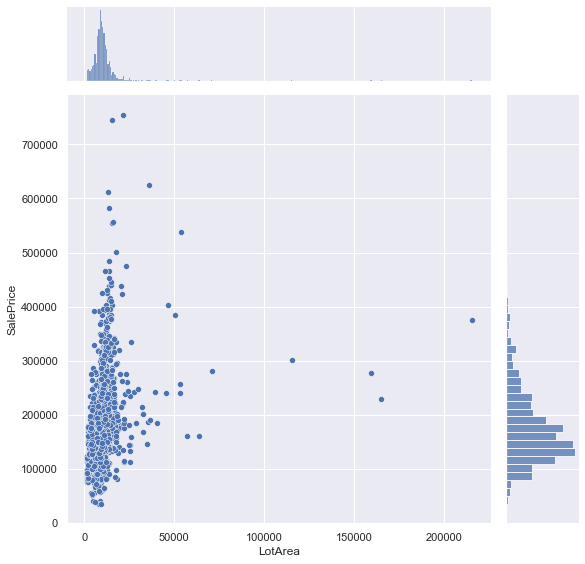

In [22]:
sb.jointplot(data = sp_la, x = "LotArea", y = "SalePrice", height = 8)

### b) Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.

In [23]:
sp_la.corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


Heatmap correlation:

<AxesSubplot:>

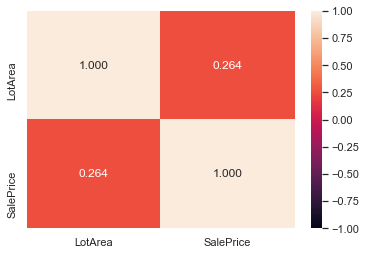

In [24]:
sb.heatmap(sp_la.corr(), vmin = -1, vmax = 1, annot = True, fmt=".3f")

### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

Response Variable : **SalePrice** <br> 
- y is SalePrice (sp)

Predictor Feature : **LotArea** <br>    
- X is LotArea (la)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(la, sp, train_size = 1100)

### e) Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using LotArea.

> Regression Model : SalePrice = $a$ $\times$ LotArea + $b$  

In [26]:
linreg.fit(X_train, y_train)

LinearRegression()

### f) Print the coefficients of the Linear Regression model you just fit, and plot the regression line on a scatterplot

In [27]:
print("Intercept:\t", linreg.intercept_)
print("Coefficient:\t", linreg.coef_)

Intercept:	 [159623.08112567]
Coefficient:	 [[1.96965571]]


Regression line on a scatterplot of the train dataset.

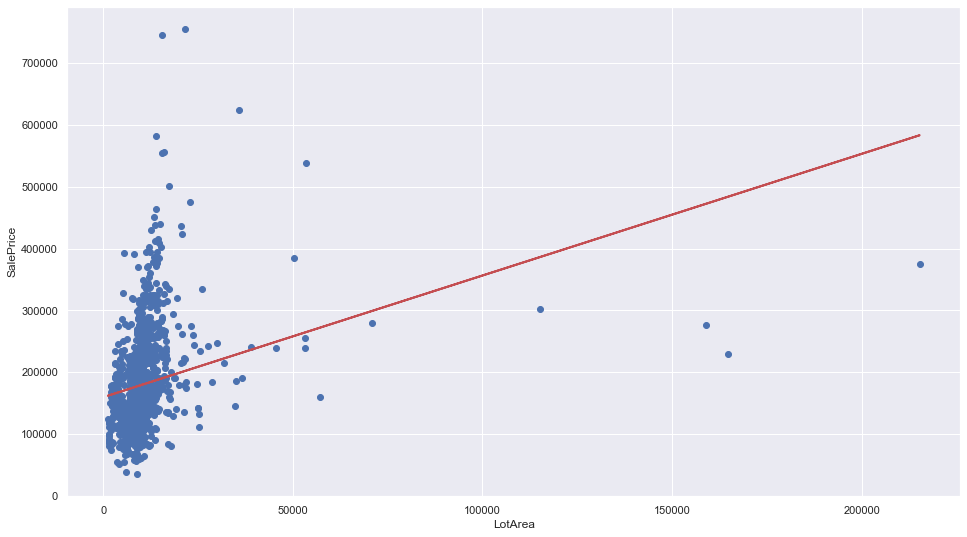

In [28]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# plot
f = plt.figure(figsize=(16, 9))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 2)
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

Regression line by prediction using the model with Train Data.

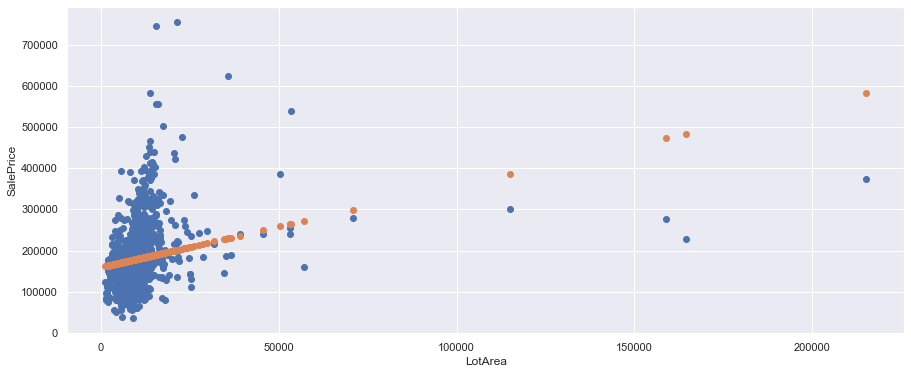

In [29]:
# prediction
y_train_pred = linreg.predict(X_train)

# scatterplot
f = plt.figure(figsize=(15, 6))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred)
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

### g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of model.
Goodness of Fit on Train Data.

In [30]:
print("R^2:\t", linreg.score(X_train, y_train))
mse = np.mean(np.square(np.array(y_train) - np.array(y_train_pred)))
print("MSE:\t", mse)

R^2:	 0.07421097144549149
MSE:	 5936406551.592489


### h) Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable LotArea.

In [31]:
y_test_pred = linreg.predict(X_test)

### i) Plot the predictions on a Scatterplot of LotArea and SalePrice in the Test Data to visualize model accuracy

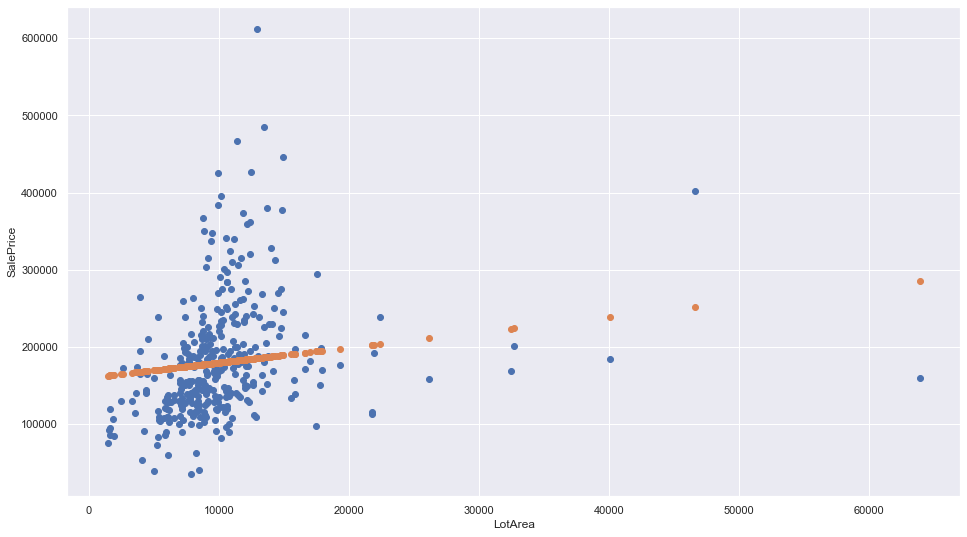

In [32]:
f = plt.figure(figsize=(16, 9))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_pred)
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

### j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training.
Goodness of Fit on Test Data vs on Train Data.

In [33]:
# Train Data
print("TRAIN DATA -")
rs_train = linreg.score(X_train, y_train)
print("\tExplained Variance (R^2):\t", rs_train)
mse_train = np.mean(np.square(np.array(y_train) - np.array(y_train_pred)))
print("\tMean Squared Error (MSE):\t", mse_train)

print()

# Test Data
print("TEST DATA -")
rs_test = linreg.score(X_test, y_test)
print("\tExplained Variance (R^2):\t", rs_test)
mse_test = np.mean(np.square(np.array(y_test) - np.array(y_test_pred)))
print("\tMean Squared Error (MSE):\t", mse_test)

# storing values for Q3
Rsq_train.append(rs_train)
MSE_train.append(mse_train)
Rsq_test.append(rs_test)
MSE_test.append(mse_test)

TRAIN DATA -
	Explained Variance (R^2):	 0.07421097144549149
	Mean Squared Error (MSE):	 5936406551.592489

TEST DATA -
	Explained Variance (R^2):	 0.05297486001688634
	Mean Squared Error (MSE):	 5666212695.819461


---
## Problem 2.2: Predicting SalePrice using TotalBsmtSF

### a) Plot SalePrice against TotalBsmtSF using any appropriate bivariate plot to note the strong linear relationship

In [34]:
tbsf = pd.DataFrame(houseData['TotalBsmtSF'])

# join SalePrice with TotalBsmtSF
sp_tbsf = pd.concat([tbsf, sp], axis = 1)

# Summary statistics for TotalBsmtSF and SalePrice
sp_tbsf.describe()

,TotalBsmtSF,SalePrice
count,1460.000000,1460.000000
mean,1057.429452,180921.195890
std,438.705324,79442.502883
min,0.000000,34900.000000
25%,795.750000,129975.000000
50%,991.500000,163000.000000
75%,1298.250000,214000.000000
max,6110.000000,755000.000000


Jointplot of SalePrice against TotalBsmtSF

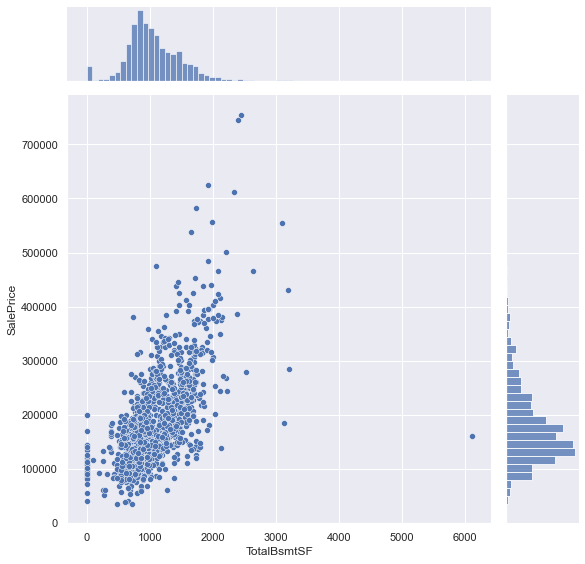

In [35]:
sb.jointplot(data = sp_tbsf, x = "TotalBsmtSF", y = "SalePrice", height = 8)

### b) Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.

In [36]:
sp_tbsf.corr()

,TotalBsmtSF,SalePrice
TotalBsmtSF,1.000000,0.613581
SalePrice,0.613581,1.000000


Heatmap correlation:

<AxesSubplot:>

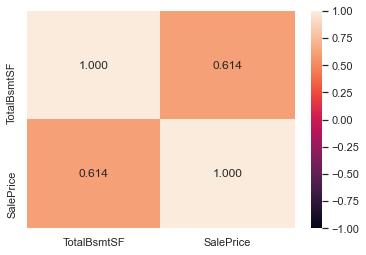

In [37]:
sb.heatmap(sp_tbsf.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".3f")

### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

Response Variable : **SalePrice** <br> 
- y is SalePrice (sp)

Predictor Feature : **TotalBsmtSF** <br>    
- X is TotalBsmtSF (tbsf)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(tbsf, sp, test_size = 360)

### e) Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using TotalBsmtSF.

> Regression Model : SalePrice = $a$ $\times$ TotalBsmtSF + $b$  

In [39]:
linreg.fit(X_train, y_train)

LinearRegression()

### f) Print the coefficients of the Linear Regression model you just fit, and plot the regression line on a scatterplot

In [40]:
print("Intercept:\t", linreg.intercept_)
print("Coefficient:\t", linreg.coef_)

Intercept:	 [69139.24908559]
Coefficient:	 [[106.89773524]]


Regression Line on a Scatterplot of Train Data.

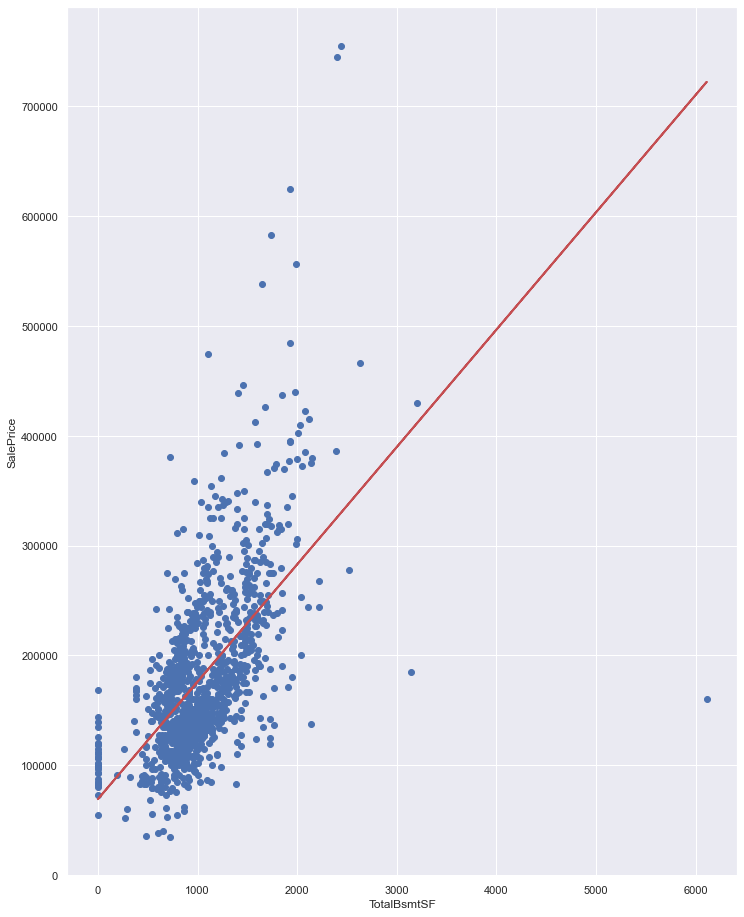

In [41]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

f = plt.figure(figsize=(12, 16))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 2)
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.show()

Regression line by prediction using the model with Train Data.

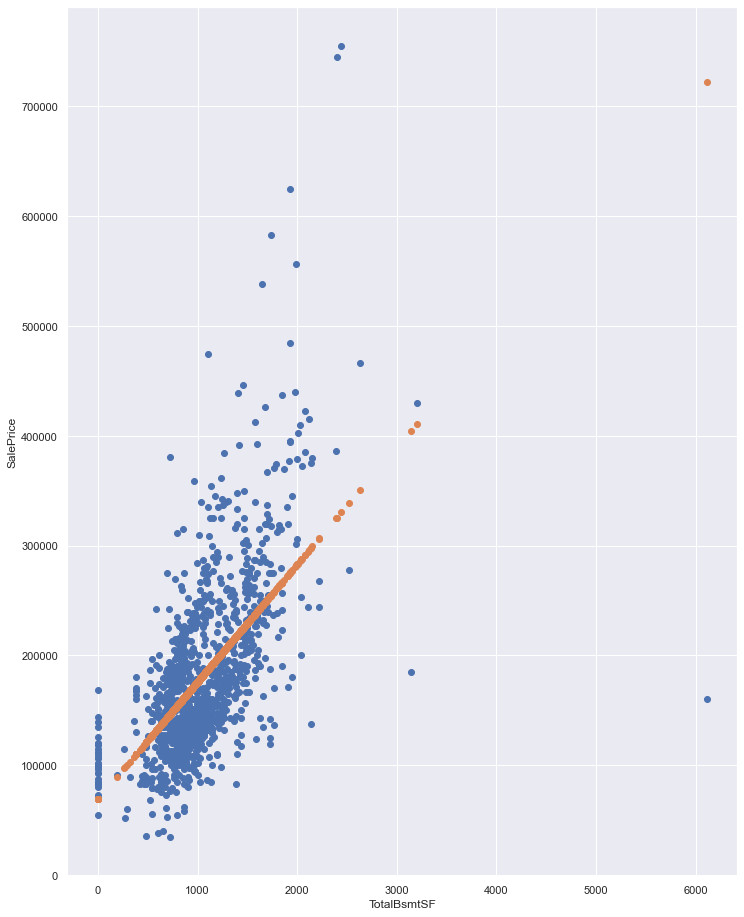

In [42]:
# predict
y_train_pred = linreg.predict(X_train)

# scatterplot
f = plt.figure(figsize=(12, 16))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred)
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.show()

### g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of model.
Goodness of Fit on Train Data.

In [43]:
print("R^2:\t", linreg.score(X_train, y_train))
mse = np.mean(np.square(np.array(y_train) - np.array(y_train_pred)))
print("MSE:\t", mse)

R^2:	 0.34997957723606143
MSE:	 4087507447.5346074


### h) Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable TotalBsmtSF.

In [44]:
y_test_pred = linreg.predict(X_test)

### i) Plot the predictions on a Scatterplot of TotalBsmtSF and SalePrice in the Test Data to visualize model accuracy

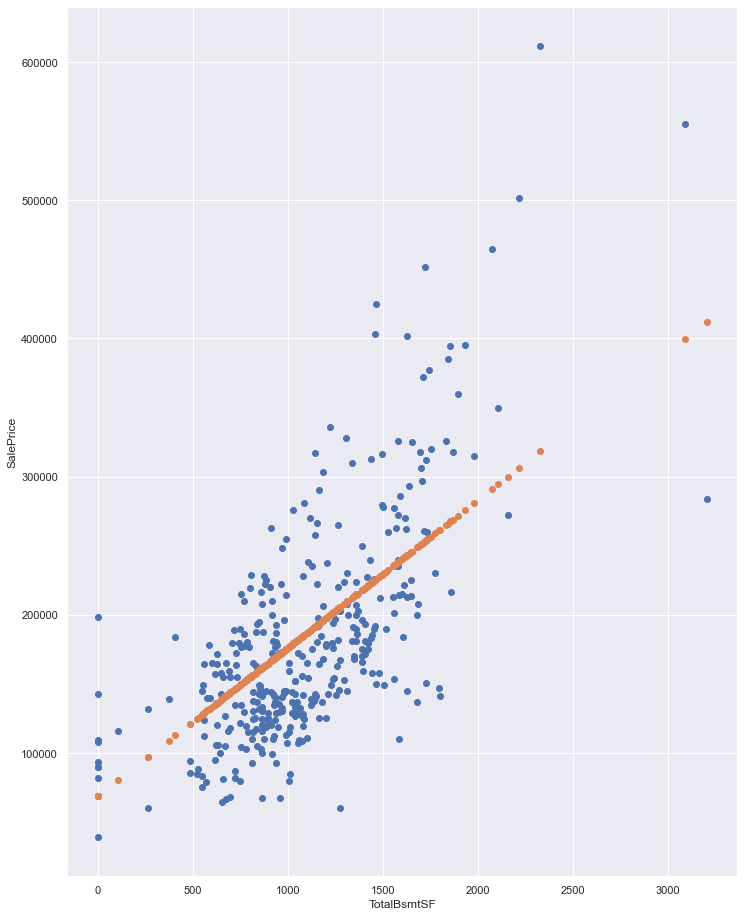

In [45]:
f = plt.figure(figsize=(12, 16))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_pred)
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.show()

### j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training.
Goodness of Fit on Test Data vs on Train Data.

In [46]:
# Train Data
print("TRAIN DATA -")
rs_train = linreg.score(X_train, y_train)
print("\tExplained Variance (R^2):\t", rs_train)
mse_train = np.mean(np.square(np.array(y_train) - np.array(y_train_pred)))
print("\tMean Squared Error (MSE):\t", mse_train)

print()

# Test Data
print("TEST DATA -")
rs_test = linreg.score(X_test, y_test)
print("\tExplained Variance (R^2):\t", rs_test)
mse_test = np.mean(np.square(np.array(y_test) - np.array(y_test_pred)))
print("\tMean Squared Error (MSE):\t", mse_test)

# storing values for Q3
Rsq_train.append(rs_train)
MSE_train.append(mse_train)
Rsq_test.append(rs_test)
MSE_test.append(mse_test)

TRAIN DATA -
	Explained Variance (R^2):	 0.34997957723606143
	Mean Squared Error (MSE):	 4087507447.5346074

TEST DATA -
	Explained Variance (R^2):	 0.45332093545990715
	Mean Squared Error (MSE):	 3478691824.0324326


---
## Problem 2.3: Predicting SalePrice using GarageArea

### a) Plot SalePrice against GarageArea using any appropriate bivariate plot to note the strong linear relationship

In [47]:
ga = pd.DataFrame(houseData['GarageArea'])

# concatenate GarageArea with SalePrice
sp_ga = pd.concat([ga, sp], axis = 1)

# Summary statistics of GarageArea and SalePrice
sp_ga.describe()

,GarageArea,SalePrice
count,1460.000000,1460.000000
mean,472.980137,180921.195890
std,213.804841,79442.502883
min,0.000000,34900.000000
25%,334.500000,129975.000000
50%,480.000000,163000.000000
75%,576.000000,214000.000000
max,1418.000000,755000.000000


Jointplot of SalePrice against GarageArea:

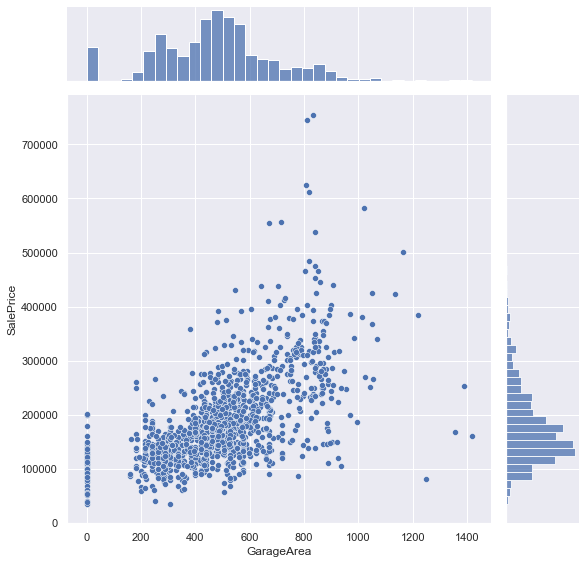

In [48]:
sb.jointplot(data = sp_ga, x = "GarageArea", y = "SalePrice", height = 8)

### b) Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.

In [49]:
sp_ga.corr()

,GarageArea,SalePrice
GarageArea,1.000000,0.623431
SalePrice,0.623431,1.000000


Heatmap correlation:

<AxesSubplot:>

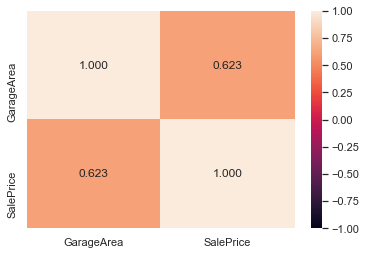

In [50]:
sb.heatmap(sp_ga.corr(), vmin = -1, vmax = 1, annot = True, fmt=".3f")

### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

Response Variable : **SalePrice** <br> 
- y is SalePrice (sp)

Predictor Feature : **GarageArea** <br>    
- X is GarageArea (ga)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(ga, sp, train_size = 1100)

### e) Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using GarageArea.

> Regression Model : SalePrice = $a$ $\times$ GarageArea + $b$  

In [52]:
linreg.fit(X_train, y_train)

LinearRegression()

### f) Print the coefficients of the Linear Regression model you just fit, and plot the regression line on a scatterplot

In [53]:
print("Intercept: \t", linreg.intercept_)
print("Coefficient: \t", linreg.coef_)

Intercept: 	 [73262.79748447]
Coefficient: 	 [[227.64132923]]


Regression line on a scatterplot of Train Data.

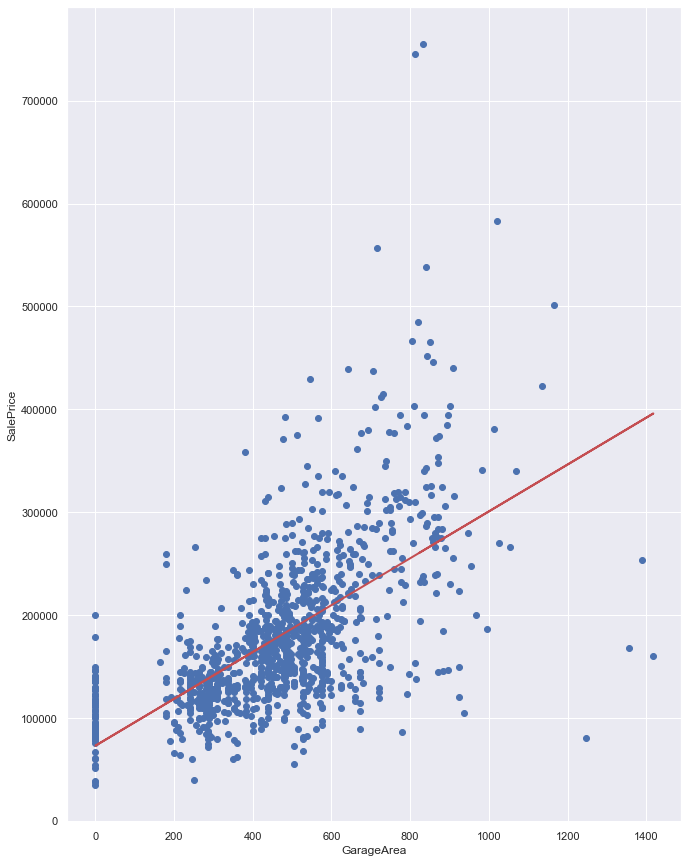

In [54]:
regline_x = X_train
regline_y = linreg.coef_ * regline_x + linreg.intercept_

# plot
f = plt.figure(figsize=(11, 15))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 2)
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.show()

Regression line by prediction using the model with the train dataset.

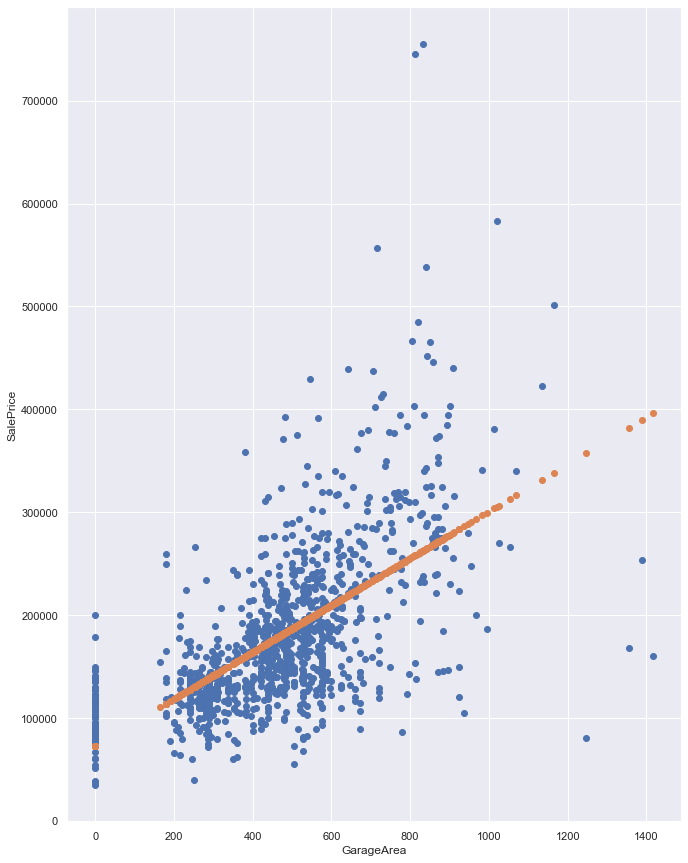

In [55]:
y_train_pred = linreg.predict(X_train)

# scatterplot
f = plt.figure(figsize=(11, 15))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred)
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.show()

### g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of model.
Goodness of Fit on Train Data.

In [56]:
print("R^2:\t", linreg.score(X_train, y_train))
mse = np.mean(np.square(np.array(y_train) - np.array(y_train_pred)))
print("MSE:\t", mse)

R^2:	 0.37213157111111295
MSE:	 3921846329.3970666


### h) Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable GarageArea.

In [57]:
y_test_pred = linreg.predict(X_test)

### i) Plot the predictions on a Scatterplot of GarageArea and SalePrice in the Test Data to visualize model accuracy

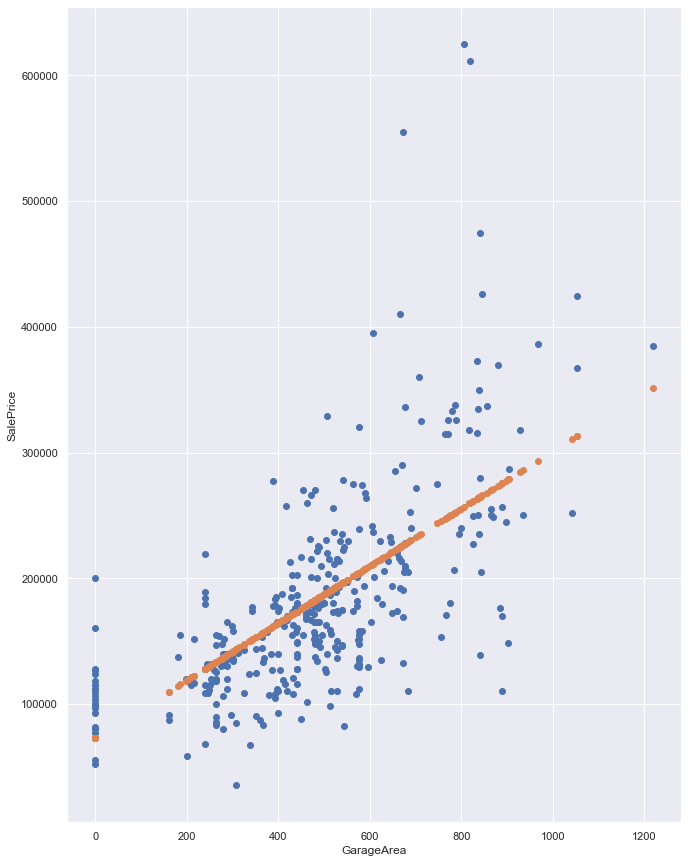

In [58]:
f = plt.figure(figsize=(11, 15))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_pred)
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.show()

### j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training.
Goodness of Fit on Test Data vs on Train Data.

In [59]:
# Train Data
print("TRAIN DATA -")
rs_train = linreg.score(X_train, y_train)
print("\tExplained Variance (R^2):\t", rs_train)
mse_train = np.mean(np.square(np.array(y_train) - np.array(y_train_pred)))
print("\tMean Squared Error (MSE):\t", mse_train)

print()

# Test Data
print("TEST DATA -")
rs_test = linreg.score(X_test, y_test)
print("\tExplained Variance (R^2):\t", rs_test)
mse_test = np.mean(np.square(np.array(y_test) - np.array(y_test_pred)))
print("\tMean Squared Error (MSE):\t", mse_test)

# storing values for Q3
Rsq_train.append(rs_train)
MSE_train.append(mse_train)
Rsq_test.append(rs_test)
MSE_test.append(mse_test)

TRAIN DATA -
	Explained Variance (R^2):	 0.37213157111111295
	Mean Squared Error (MSE):	 3921846329.3970666

TEST DATA -
	Explained Variance (R^2):	 0.436452790822329
	Mean Squared Error (MSE):	 3655946965.542136


---
## Problem 3 : Best Uni-Variate Model to Predict SalePrice
Compare and contrast the four models in terms of Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data,
the accuracy of prediction on Test Data, and comment on which model you think is the best to predict “SalePrice”.

In [60]:
variables = ['GrLivArea', 'LotArea   ', 'TotalBsmtSF', 'GarageArea']

# in terms of Explained Variance (R^2) on Train Data
print("Explained Variance on Train Data:")
for i in range(4):
    print("\t", variables[i], "\t", Rsq_train[i], sep="")
    
# in terms of Mean Squared Error (MSE) on Train Data
print("\nMean Squared Error on Train Data:")
for i in range(4):
    print("\t", variables[i], "\t", MSE_train[i], sep="")
    
# in terms of Explained Variance (R^2) on Test Data
print("\nExplained Variance on Test Data:")
for i in range(4):
    print("\t", variables[i], "\t", Rsq_train[i], sep="")

# in terms of Mean Squared Error (MSE) on Test Data
print("\nMean Squared Error on Test Data:")
for i in range(4):
    print("\t", variables[i], "\t", MSE_test[i], sep="")

Explained Variance on Train Data:
	GrLivArea	0.49415534202693934
	LotArea   	0.07421097144549149
	TotalBsmtSF	0.34997957723606143
	GarageArea	0.37213157111111295

Mean Squared Error on Train Data:
	GrLivArea	3181345041.462254
	LotArea   	5936406551.592489
	TotalBsmtSF	4087507447.5346074
	GarageArea	3921846329.3970666

Explained Variance on Test Data:
	GrLivArea	0.49415534202693934
	LotArea   	0.07421097144549149
	TotalBsmtSF	0.34997957723606143
	GarageArea	0.37213157111111295

Mean Squared Error on Test Data:
	GrLivArea	3015193284.780482
	LotArea   	5666212695.819461
	TotalBsmtSF	3478691824.0324326
	GarageArea	3655946965.542136


### Explained Variance
Explained variation measures the proportion to which a mathematical model accounts for the variation of a given data set.
The greater the variance explained, the better the variable is at predicting SalePrice, in general.

### Mean Squared Error
Mean squared error (MSE) of an estimator measures the average of the squares of the errors (difference between the estimated values and the actual value).
The lower the Mean Squared Error, the more accurate the prediction, hence the better the variable is at predicting SalePrice, in general.

__

#### Explained Variance on Train Data:
From the values shown above, we can see that GrLivArea has the highest explained variance on Train Data.

#### Mean Squared Error on Train Data:
GrLivArea has the lowest mean square error.

#### Explained Variance on Test Data:
Once again, with the comparison done above, GrLivArea has the highest explained variance among all 4 variables.

#### Mean Squared Error on Test Data:
GrLivArea still has the lowest mean squared error on Test Data.

__
### Conclusion
On both datasets, GrLivArea has a much higher explained variance than LotArea, TotalBsmtSF, and GarageArea. For mean squared error, GrLivArea has lower numbers than these 3 other variables.

Hence, we can infer that LotArea, TotalBsmtSF, and GarageArea are not as useful in predicting SalePrice. The model using GrLivArea has the most accurate prediction.

In conclusion, from my analysis, GrlivArea is the best variable to be used to predict SalePrice of these houses.